In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install probscale
import probscale

from scipy.stats import norm, kstest, shapiro

clear_bkgd = {'axes.facecolor':'none', 'figure.facecolor':'none'}
sns.set(style='ticks', context='talk', color_codes=True, rc=clear_bkgd)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.2/434.2 kB 5.0 MB/s eta 0:00:00


In [6]:
# Data Reading

TARGET = 100
TOL = 0.1
LSE = TARGET + TOL
LIE = TARGET - TOL

df = pd.read_excel("dataset.xlsx")
values = df["column_name"].values
values = values[~np.isnan(values)]

measurement_indices = np.array(list(range(len(values))))

print(TARGET)
print(LSE)
print(LIE)
print(values)
print(len(values))


100
100.1
99.9
[ 99.74959351  99.9711556  100.08427964 100.03609754  99.82050129
  99.98477232 100.05720566 100.16926067  99.99333518 100.02130344
 100.06848478  99.74607107  99.87803834 100.06102285 100.07726215
 100.03078294  99.88628535 100.01418639 100.0727347   99.75622139
 100.05559781  99.88713559  99.8406307   99.98253876 100.03568712
 100.01543953  99.99980189  99.94651594  99.84778202  99.94976669
 100.04273377 100.06409638 100.03323044  99.94789492 100.18401642
 100.04822286 100.12831217 100.0066657   99.87682345  99.85699875
  99.953527    99.97014269  99.93119537 100.13438193 100.07162335
 100.28454403 100.03094365 100.10878787 100.02243906 100.12238487
 100.09487151 100.07487468 100.09085605  99.9362602  100.05254894
 100.18958953 100.09732289  99.90103378  99.95521695 100.03175775
  99.985638    99.89370103 100.12938125 100.06853681 100.06120142
 100.11083254  99.97619437  99.97804138 100.17823461  99.90661285
  99.94993614 100.00672682 100.02449602 100.08813835 100.0250

In [8]:
# Normality Test

if len(values) <= 30:
    test = kstest(values, "norm")
else:
    test = shapiro(values)

print(test)

if test[1] > 0.05:
    print("Os dados seguem a distribuição normal!")
else:
    print("Os dados NÃO seguem a distribuição normal!")


ShapiroResult(statistic=0.9847327454540172, pvalue=0.3037593760066082)
Os dados seguem a distribuição normal!


Text(0.5, 1.0, 'Gráfico de Probabilidade Normal')

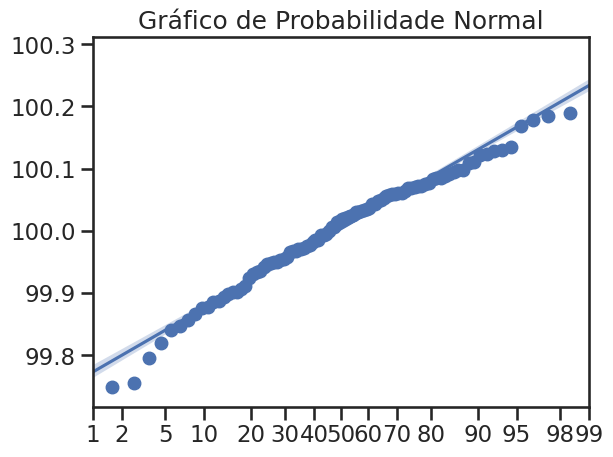

In [7]:
# Normal Probability Plot

plt.figure()
probscale.probplot(values, bestfit=True, estimate_ci=True,
                   line_kws={'label': 'Best Fit', 'color': 'b'},
                   scatter_kws={'label': 'Observations'})
plt.title("Gráfico de Probabilidade Normal")


([<matplotlib.axis.YTick at 0x7f873a9befd0>,
 [Text(0, 99.9, '−0.1'), Text(0, 100.0, '0.0'), Text(0, 100.1, '0.1')])

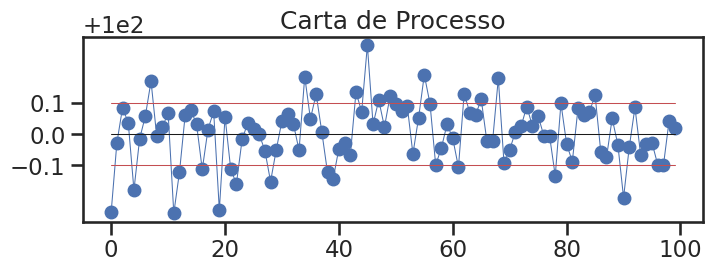

In [9]:
# Process Control Chart

values_lsc = max(values)*np.ones(len(values))
values_lic = min(values)*np.ones(len(values))
values_avg = np.mean(values)*np.ones(len(values))

values_lse = LSE*np.ones(len(values))
values_lie = LIE*np.ones(len(values))
values_targ = TARGET*np.ones(len(values))

plt.figure(figsize=[1.25*6.4, 0.5*4.8])
plt.plot(measurement_indices, values, 'o-', linewidth=0.75)
plt.plot(measurement_indices, values_targ, 'k', linewidth=0.75)
plt.plot(measurement_indices, values_lie, 'r', linewidth=0.75)
plt.plot(measurement_indices, values_lse, 'r', linewidth=0.75)
plt.title('Carta de Processo')
plt.yticks(ticks=[LIE, TARGET, LSE])


Text(0.5, 1.0, 'Histograma')

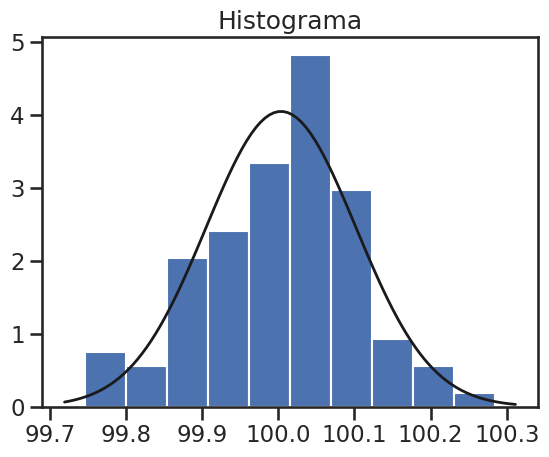

In [10]:
# Histogram

plt.figure()
plt.hist(values, density=True)

values_mean, values_std = norm.fit(values)
values_min, values_max = plt.xlim()
values_values = np.linspace(values_min, values_max, 100)
normal_values = norm.pdf(values_values, values_mean, values_std)

plt.plot(values_values, normal_values, 'k', linewidth=2)
plt.title("Histograma")


Text(0.5, 1.0, 'Histograma')

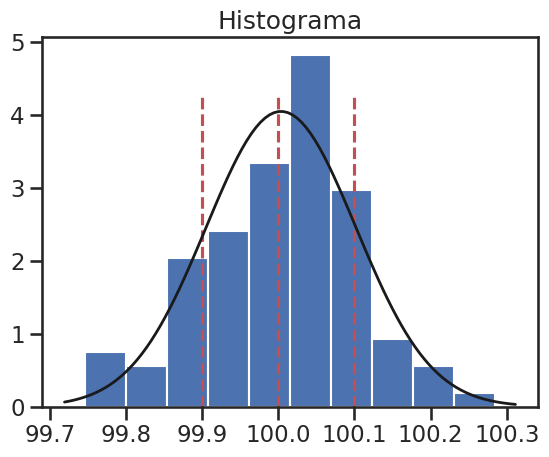

In [11]:
# Capacity Histogram

plt.figure()
#plt.figure(figsize=[1.5*6.4, 4.8])
plt.hist(values, density=True)

values_mean, values_std = norm.fit(values)
values_min, values_max = plt.xlim()
values_values = np.linspace(values_min, values_max, 100)
normal_values = norm.pdf(values_values, values_mean, values_std)

reference_values = np.linspace(0, 1.05*max(normal_values), 5)

lie = LIE*np.ones(5)
lse = LSE*np.ones(5)
targ = TARGET*np.ones(5)

plt.plot(lie, reference_values, 'r--')
plt.plot(lse, reference_values, 'r--')
plt.plot(targ, reference_values, 'r--')

plt.plot(values_values, normal_values, 'k', linewidth=2)
plt.title("Histograma")


In [12]:
# Process Capability

cp = (LSE - LIE)/(6*np.std(values))
print("CP:", cp)

cpk = min((np.mean(values) - LIE), (LSE - np.mean(values)))/(3*np.std(values))
print("CPK:", cpk)


CP: 0.3383801276071958
CPK: 0.32645467574881115


Text(0.5, 1.0, 'Carta de Amplitude Móvel')

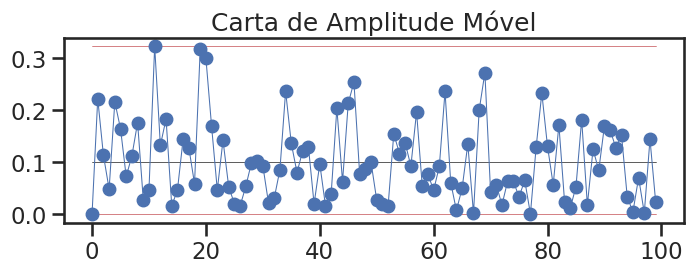

In [13]:
# Moving Range Chart

values_am = np.absolute(np.diff(values))
values_am = np.append([0], values_am)

values_am_lsc = max(values_am)*np.ones(len(values))
values_am_lic = min(values_am)*np.ones(len(values))
values_am_avg = np.mean(values_am)*np.ones(len(values))

plt.figure(figsize=[1.25*6.4, 0.5*4.8])
plt.plot(measurement_indices, values_am_avg, 'k', linewidth=0.5)
plt.plot(measurement_indices, values_am_lsc, 'r-', linewidth=0.5)
plt.plot(measurement_indices, values_am_lic, 'r-', linewidth=0.5)
plt.plot(measurement_indices, values_am, 'o-', linewidth=0.75)
plt.title('Carta de Amplitude Móvel')


([<matplotlib.axis.YTick at 0x7f873b0bd390>,
 [Text(0, 99.9, '−0.1'), Text(0, 100.0, '0.0'), Text(0, 100.1, '0.1')])

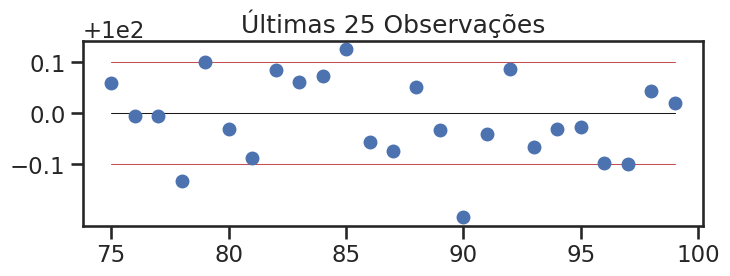

In [14]:
# Last 25 Measurements

plt.figure(figsize=[1.25*6.4, 0.5*4.8])
plt.plot(measurement_indices[-25:], values_targ[-25:], 'k', linewidth=0.75)
plt.plot(measurement_indices[-25:], values_lie[-25:], 'r', linewidth=0.75)
plt.plot(measurement_indices[-25:], values_lse[-25:], 'r', linewidth=0.75)
plt.plot(measurement_indices[-25:], values[-25:], 'o', linewidth=0.75)
plt.title('Últimas 25 Observações')
plt.yticks(ticks=[LIE, TARGET, LSE])
